### Vấn đề: Xây dựng mô hình dự đoán giá trung bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, kinh doanh

#### 1. Tạo mô hình dự đoán giá bơ trung bình của Mỹ (sử dụng các thuật toán Regression)

2. Dự đoán giá bơ hữu cơ của vùng California (sử dụng các thuật toán Time Series)

3. Dự đoán giá bơ thường của vùng California (sử dụng mô hình ở câu 1 và 2)

4. Chọn 1 vùng mà bạn cho rằng trong tương lai có thể mở rộng trồng trọt, sản xuất và kinh doanh bơ thường và/hoặc bơ hữu cơ. Hãy chứng minh.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from cheating_model import *
from cheating_result import *
from cheating_visualization import *

In [ ]:
data = pd.read_csv('avocado.csv')
print(data.shape)
data

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
df = data.copy()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
df['month'] = list(pd.DatetimeIndex(df['Date']).month)
df['month'].value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64

In [ ]:
# [3,4,5] : 0
# [6,7,8] : 1
# [9,10,11] : 2
# [12,1,2] : 3

def to_seasons(month):
    if month in [3,4,5]:
        return 0
    elif month in [6,7,8]:
        return 1
    elif month in [9,10,11]:
        return 2
    else:
        return 3
    
df['season'] = df['month'].apply(lambda x: to_seasons(x))

In [ ]:
df['season'].value_counts()

3    5075
0    4752
2    4212
1    4210
Name: season, dtype: int64

In [ ]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [ ]:
df['organic'] = df['type'].replace(['conventional','organic'],[0,1])
df['organic'].value_counts()

0    9126
1    9123
Name: organic, dtype: int64

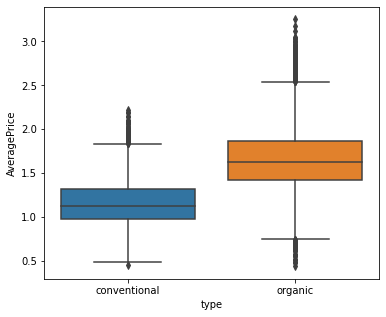

In [ ]:
plt.figure(figsize=(6,5))
sb.boxplot(y='AveragePrice', x='type',data=df)
plt.show()

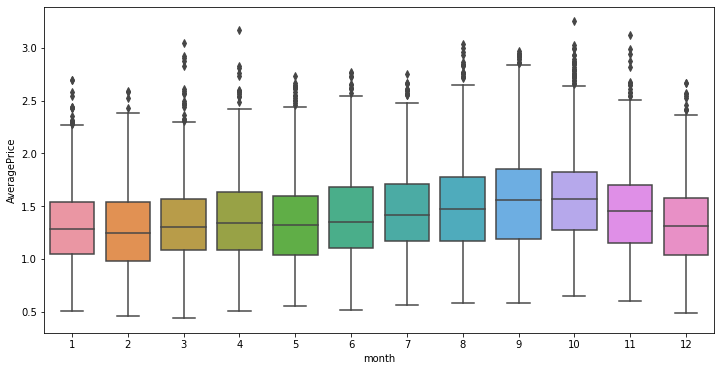

In [ ]:
plt.figure(figsize=(12,6))
sb.boxplot(y='AveragePrice', x='month',data=df)
plt.show()

### Nhận xét
- Có sự chênh lệch về giá bơ thường của vùng California giữa các tháng
#### => Tháng có tác động đến giá cả

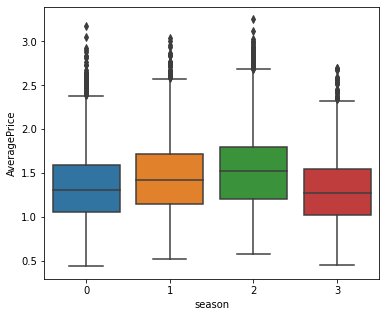

In [ ]:
plt.figure(figsize=(6,5))
sb.boxplot(y='AveragePrice', x='season',data=df)
plt.show()

### Nhận xét
- Cũng giống như tháng, giá bơ thường của vùng California có sự chênh lệch giữa các mùa
#### => Mùa có tác động đến giá cả

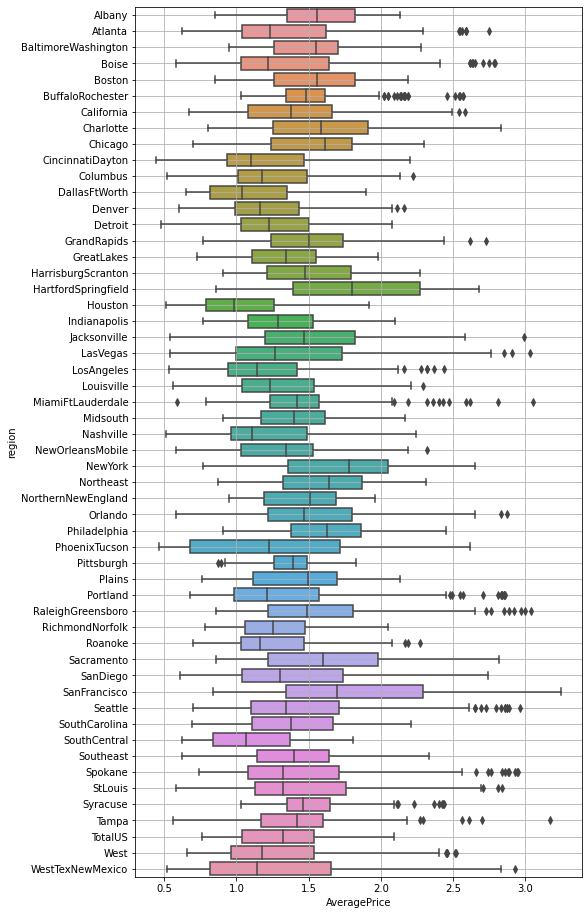

In [ ]:
plt.figure(figsize=(8,16))
sb.boxplot(x='AveragePrice', y='region',data=df)
plt.grid()
plt.show()

### Nhận xét
- Giá bơ ở các vùng chênh lệch nhiều

In [ ]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'season', 'organic'],
      dtype='object')

In [ ]:
df[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000


In [ ]:
X = df[['organic','season','region',
        'Total Volume','Small Bags', 'Large Bags', 'XLarge Bags']]
y = df['AveragePrice']

In [ ]:
x = pd.get_dummies(data=X,columns=['region'])
x_cols = x.columns
print(x_cols)
x.head()

Index(['organic', 'season', 'Total Volume', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_RaleighGreensbo

,organic,season,Total Volume,Small Bags,Large Bags,XLarge Bags,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,3,64236.62,8603.62,93.25,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,54876.98,9408.07,97.49,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,118220.22,8042.21,103.14,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,78992.15,5677.40,133.76,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,51039.60,5986.26,197.69,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import datetime

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    RandomForestRegressor(n_estimators=200),
    XGBRegressor()
]

In [ ]:
cv_df = model_comparison_Xy(models,x,y,0.3,CV=10,scale=RobustScaler())
cv_df

,model_name,test_scores,train_scores,abs_scores,time_scores,min,max,std
0,LinearRegression,0.545892,0.551504,0.011721,74.21,0.530384,0.564095,0.009429
1,KNeighborsRegressor,0.740516,0.833213,0.092698,163.51,0.727756,0.751806,0.007543
2,DecisionTreeRegressor,0.675367,1.000000,0.324633,129.78,0.656673,0.690649,0.010261
3,RandomForestRegressor,0.831516,0.975704,0.144188,329.86,0.826630,0.839109,0.003575
4,RandomForestRegressor,0.827432,0.976560,0.149128,732.93,0.817942,0.835120,0.004938
5,XGBRegressor,0.810945,0.901896,0.090952,647.52,0.804963,0.819384,0.003998


In [ ]:
cv_df1 = model_comparison_Xy(models,x,y,0.3,CV=10,scale=StandardScaler())
cv_df1

,model_name,test_scores,train_scores,abs_scores,time_scores,min,max,std
0,LinearRegression,0.547321,0.550800,0.007376,62.63,0.532114,0.558979,0.006785
1,KNeighborsRegressor,0.786488,0.868599,0.082111,230.75,0.782658,0.794375,0.004059
2,DecisionTreeRegressor,0.679688,1.000000,0.320312,140.98,0.663419,0.702064,0.012712
3,RandomForestRegressor,0.831141,0.975704,0.144563,513.17,0.823450,0.838126,0.003870
4,RandomForestRegressor,0.831038,0.976513,0.145475,536.13,0.822693,0.841218,0.005462
5,XGBRegressor,0.811574,0.900620,0.089047,408.21,0.803212,0.817883,0.004050


In [ ]:
cv_df1 = model_comparison_Xy(models,x,y,0.3,CV=10)
cv_df1

,model_name,test_scores,train_scores,abs_scores,time_scores,min,max,std
0,LinearRegression,0.546312,0.550439,0.005885,86.91,0.540586,0.551857,0.004088
1,KNeighborsRegressor,0.501451,0.669806,0.168355,105.01,0.485394,0.517107,0.010700
2,DecisionTreeRegressor,0.677458,1.000000,0.322542,148.01,0.654817,0.701793,0.013727
3,RandomForestRegressor,0.829607,0.975840,0.146233,402.09,0.823296,0.835301,0.004103
4,RandomForestRegressor,0.828413,0.976479,0.148067,637.42,0.814445,0.837242,0.006260
5,XGBRegressor,0.811723,0.900352,0.088629,532.98,0.806341,0.816747,0.003344


### Đánh giá
- Mô hình RandomForestRegressor có scale cho ra kết quả tốt nhất nhưng mất nhiều thời gian nhất

In [ ]:
scaler = RobustScaler().fit(x)
x = pd.DataFrame(scaler.transform(x),columns=x_cols)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((12774, 60), (5475, 60), (12774,), (5475,))

Time: 1848
Best parameter: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 250}
>>> train R-square: 1.0
>>> test R-square: 0.8497584316800705
>>> MSE: 0.02425647633884931
>>> MAE: 0.10881456803652968


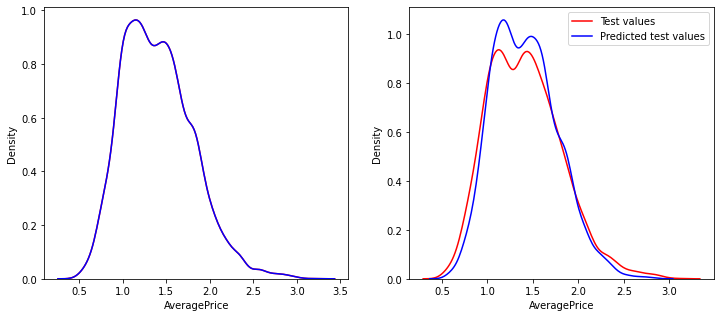

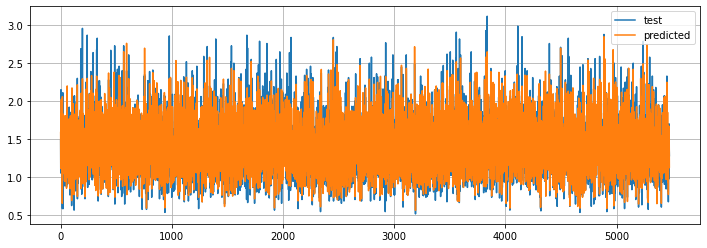

In [ ]:
param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False] 
}

model = gridsearch_bestpara(xtrain,xtest,ytrain,ytest,RandomForestRegressor,param_grid)
ycon_result(xtrain,xtest,ytrain,ytest,model)

In [ ]:
model.best_params_

{'bootstrap': False, 'max_features': 'log2', 'n_estimators': 250}

In [ ]:
y.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

## Đánh giá
- So với các mô hình khác, mô hình RandomForestRegressor với bootstrap=False, max_features='log2', n_estimators=250 cho ra kết quả cao nhất với thời gian lâu nhất
    - R2: 0.8497584316800705
    - MSE: 0.02425647633884931
    - MAE: 0.10881456803652968
### => Có thể sử dụng mô hình